# **Dados do Indice IBOVESPA B3**

## **O problema**

Você foi recentemente alocado em uma equipe de cientistas de dados de um grande fundo de investimentos brasileiro. Sua missão inicial é desenvolver um modelo preditivo capaz de prever se o índice IBOVESPA vai fechar em alta ou baixa no dia seguinte, com base em dados históricos do próprio índice. Esse modelo será usado como insumo para alimentar dashboards internos de tomada de decisão dos analistas quantitativos da empresa.

### **Dados**

Utilize os dados históricos do índice IBOVESPA, disponíveis publicamente: https://br.investing.com/indices/bovespa-historical-data
Requisitos:  
• Selecione o período “diário”.  
• Baixe um intervalo de pelo menos 2 anos de dados.  
• Realize o pré-processamento necessário para utilizar os dados no modelo.

### **Caracteristicas (Colunas)**

**Data** - Data de cada de negociação do IBOVESPA  
**Último** - Fechamento da negociação diária  
**Abertura** - Inicio das negociações e onde a negociação abriu  
**Máxima** - Nível máximo que o IBOVESPA alcançou no dia  
**Mínimo** - Nível mínimo que o IBOVESPA alcançou no dia  
**Vol.** - Volume de negociação diária  
**Var%** - Variação percentual diária partindo de sua abertura

### **Objetivo**

Criar um modelo que preveja se o fechamento do IBOVESPA do dia seguinte será maior ou menor que o do dia atual, ou seja:
Tech challenge Página 3 de 5.  
Seu modelo deve prever a tendência (↑ ou ↓) com acuracidade mínima de 75% em um conjunto de teste. O conjunto de testes deverá conter o último mês (30 dias) de dados disponíveis.

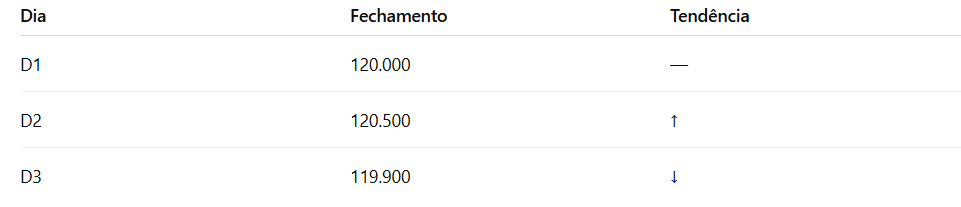

In [103]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
#pip install yfinance
from datetime import datetime
from talib import RSI, SMA, EMA, ADX, MACD, MFI, BBANDS, STOCH,MA_Type


In [ ]:
url_2anos = "https://raw.githubusercontent.com/JacksonvBarbosa/Analise_Indice_Ibovespa/refs/heads/Jackson/Dataset/Dados%20Hist%C3%B3ricos%20-%20Ibovespa.csv"

In [ ]:
# Dados do IBOVESPA na yfinance da Yahoo
#df_ibov_yf =  yf.download('^BVSP', start='2015-06-01', end='2025-06-27', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df_ibov = pd.read_csv(url_2anos)

# Padronização e limpeza dos dados + análise descritiva e exploratória básica

In [73]:
df_ibov_copia = df_ibov.copy()
df_ibov_copia

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,04.06.2025,137.002,137.547,138.797,136.695,"10,20M","-0,40%"
1,03.06.2025,137.546,136.787,137.672,136.175,"9,70B","0,56%"
2,02.06.2025,136.787,137.026,138.471,136.483,"9,10B","-0,18%"
3,30.05.2025,137.027,138.546,138.637,136.726,"15,14B","-1,09%"
4,29.05.2025,138.534,138.869,139.108,137.993,"8,83B","-0,25%"
...,...,...,...,...,...,...,...
597,10.01.2023,110.817,109.129,111.193,108.478,"13,70M","1,55%"
598,09.01.2023,109.130,108.964,109.938,108.134,"12,05M","0,15%"
599,06.01.2023,108.964,107.642,109.433,107.642,"12,63M","1,23%"
600,05.01.2023,107.641,105.336,107.743,105.333,"15,51M","2,19%"


In [93]:
display(df_ibov_copia.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      602 non-null    object 
 1   Último    602 non-null    float64
 2   Abertura  602 non-null    float64
 3   Máxima    602 non-null    float64
 4   Mínima    602 non-null    float64
 5   Vol.      602 non-null    object 
 6   Var%      602 non-null    object 
dtypes: float64(4), object(3)
memory usage: 33.1+ KB


None

In [7]:
display(f'Tamanho do dataset: linhas/coluna{df_ibov_copia.shape}')

'Tamanho do dataset: linhas/coluna(602, 7)'

In [8]:
display(df_ibov_copia.describe())

,Último,Abertura,Máxima,Mínima
count,602.000000,602.000000,602.000000,602.000000
mean,122.679924,122.625791,123.474872,121.867294
std,9.312727,9.324912,9.257544,9.368049
min,97.926000,97.926000,99.258000,96.997000
25%,117.068500,117.031250,117.960500,116.177000
50%,125.367500,125.293000,126.206000,124.567000
75%,129.166500,129.125000,129.852250,128.209000
max,140.110000,140.109000,140.382000,138.966000


### Observando as informações dos dados, para melhor manipulação futura devemos converter a coluna **Data** para DateTime e a coluna **Vol.** e **Var%** para Float

1. Qual é a média de fechamento nos ultimos 2 ano?  
* 122 mil pontos  
2. O quanto os pontos estão dispersos da média?  
* mais ou menos 9.3mil pontos
3. Quais foi a mínima e a máxima em pontos que o IBOVESPA alcançou nesses 2 ano?  
* **minima** de 97.926 pontos e uma **máxima** de 140.11 pontos  
4. A mediana está próxima da média de pontos?  
* Sim a **mediana** mais ou menos 3 mil pontos ficando dentro do desvio padrão de fechamentodo indice  


### Uma análise básica exploratória, como uma **mediana** próxima da média nos mostrando que não tivemos umas dispersão significativa vamos ver mais a frente mais da para perceber que não tivemos um outlier nesse periodo

In [9]:
# Varifica dados Nulos
df_ibov_copia.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
dtype: int64

# Inserindo indicadores que irão nos auxiliar na criação dos modelos de ML

In [152]:
# RSI
rsi = RSI(df_ibov_copia['Último'], timeperiod=14)
# SMA
sma = SMA(df_ibov_copia['Último'], timeperiod=14)
# EMA
ema = EMA(df_ibov_copia['Último'], timeperiod=14)
# BBANDS
upperband, middleband, lowerband = BBANDS(df_ibov_copia['Último'], matype= MA_Type.T3, timeperiod=14)
# ADX
adx =  ADX(df_ibov_copia['Máxima'], df_ibov_copia['Mínima'], df_ibov_copia['Último'], timeperiod=14)
# MACD fastperiod=12, slowperiod=26
macd, macdsignal, macdhist = MACD(df_ibov_copia['Último'], fastperiod=9, slowperiod=17, signalperiod=9)
# MFI
mfi = MFI(df_ibov_copia['Máxima'], df_ibov_copia['Mínima'], df_ibov_copia['Último'], df_ibov_copia['Vol.'], timeperiod=14)
# STOCH
slowk, slowd = STOCH(df_ibov_copia['Máxima'], df_ibov_copia['Mínima'], df_ibov_copia['Último'], fastk_period=5, slowk_period=14, slowk_matype=0, slowd_period=3, slowd_matype=0)

In [136]:
colunas_Novas = ['Rsi', 'Sma', 'Ema', 'UpperBand', 'LowerBand', 'Adx', 'Macd', 'MacdHist', 'Mfi', 'Slowk', 'Slowd']

In [153]:
series_com_nomes = [serie.to_frame(nome) for serie, nome in zip([rsi,sma,ema,upperband,lowerband,adx,macd,macdhist,mfi,slowk,slowd], colunas_Novas)]

In [154]:
df_ibov_com_indic = pd.concat([df_ibov_copia] + series_com_nomes, axis=1)
df_ibov_com_indic

,Último,Abertura,Máxima,Mínima,Vol.,Var%,Rsi,Sma,Ema,UpperBand,LowerBand,Adx,Macd,MacdHist,Mfi,Slowk,Slowd
Data,,,,,,,,,,,,,,,,,
2025-06-04,137.002,137.547,138.797,136.695,1.020000e+12,"-0,40%",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-03,137.546,136.787,137.672,136.175,9.700000e+11,"0,56%",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-02,136.787,137.026,138.471,136.483,9.100000e+11,"-0,18%",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-30,137.027,138.546,138.637,136.726,1.514000e+12,"-1,09%",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-29,138.534,138.869,139.108,137.993,8.830000e+11,"-0,25%",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10,110.817,109.129,111.193,108.478,1.370000e+12,"1,55%",50.914197,112.105143,111.446700,115.465970,110.359358,24.275610,0.235773,-0.315577,45.662813,50.086128,51.461223
2023-01-09,109.130,108.964,109.938,108.134,1.205000e+12,"0,15%",45.556597,111.877571,111.137807,115.827558,109.884998,23.377863,-0.003707,-0.444045,39.938315,47.381246,49.754882
2023-01-06,108.964,107.642,109.433,107.642,1.263000e+12,"1,23%",45.054203,111.505143,110.847966,115.776448,109.714402,22.825626,-0.188676,-0.503212,34.034963,43.102267,46.856547


In [94]:
# Formatando caracteristica Data e Convertendo em datetime
#df_ibov_copia['Data'] = pd.to_datetime(df_ibov_copia['Data'], format = '%d.%m.%Y').dt.strftime('%d/%m/%Y')
#df_ibov_copia['Data'] = pd.to_datetime(df_ibov_copia['Data'], format='%d.%m.%Y')

# Criando index tipo Dateindex
dateparse = lambda dates: datetime.strptime(dates, '%d.%m.%Y')
df_ibov_copia = pd.read_csv(url, parse_dates = ['Data'], index_col= 'Data', date_parser=dateparse)

df_ibov_copia

C:\Users\jacom\AppData\Local\Temp\ipykernel_23944\333086338.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_ibov_copia = pd.read_csv(url, parse_dates = ['Data'], index_col= 'Data', date_parser=dateparse)


,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2025-06-04,137.002,137.547,138.797,136.695,"10,20M","-0,40%"
2025-06-03,137.546,136.787,137.672,136.175,"9,70B","0,56%"
2025-06-02,136.787,137.026,138.471,136.483,"9,10B","-0,18%"
2025-05-30,137.027,138.546,138.637,136.726,"15,14B","-1,09%"
2025-05-29,138.534,138.869,139.108,137.993,"8,83B","-0,25%"
...,...,...,...,...,...,...
2023-01-10,110.817,109.129,111.193,108.478,"13,70M","1,55%"
2023-01-09,109.130,108.964,109.938,108.134,"12,05M","0,15%"
2023-01-06,108.964,107.642,109.433,107.642,"12,63M","1,23%"


In [11]:
df_ibov_copia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 602 entries, 2025-06-04 to 2023-01-04
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    602 non-null    float64
 1   Abertura  602 non-null    float64
 2   Máxima    602 non-null    float64
 3   Mínima    602 non-null    float64
 4   Vol.      602 non-null    object 
 5   Var%      602 non-null    object 
dtypes: float64(4), object(2)
memory usage: 32.9+ KB


In [95]:
# Função para conversão dos dados de Volume de string para float
## OBS.: Caso acertando com o grupo e vermos a necessidade de mudar par outro tipo fazer a mudança
def converter_volume(vol):
    if pd.isna(vol):
        return np.nan
    vol = vol.upper().replace(',', '').strip()
    if vol.endswith('B'):
        return float(vol[:-1]) * 1e9
    elif vol.endswith('M'):
        return float(vol[:-1]) * 1e9
    elif vol.endswith('K'):
        return float(vol[:-1]) * 1e3
    else:
        return float(vol)
        
df_ibov_copia['Vol.'] = df_ibov_copia['Vol.'].apply(converter_volume)

In [13]:
df_ibov_copia

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2025-06-04,137.002,137.547,138.797,136.695,1.020000e+12,"-0,40%"
2025-06-03,137.546,136.787,137.672,136.175,9.700000e+11,"0,56%"
2025-06-02,136.787,137.026,138.471,136.483,9.100000e+11,"-0,18%"
2025-05-30,137.027,138.546,138.637,136.726,1.514000e+12,"-1,09%"
2025-05-29,138.534,138.869,139.108,137.993,8.830000e+11,"-0,25%"
...,...,...,...,...,...,...
2023-01-10,110.817,109.129,111.193,108.478,1.370000e+12,"1,55%"
2023-01-09,109.130,108.964,109.938,108.134,1.205000e+12,"0,15%"
2023-01-06,108.964,107.642,109.433,107.642,1.263000e+12,"1,23%"


In [14]:
# Substitui os caracteres (%) por (vázio) e (,) por (.) e converte tipo objeto para float
df_ibov_copia['Var%'] = df_ibov_copia['Var%'].str.replace('%', '').str.replace(',', '.').astype(float)

In [15]:
print(df_ibov_copia[['Vol.', 'Var%']].dtypes)
print(df_ibov_copia[['Vol.', 'Var%']].head())

Vol.    float64
Var%    float64
dtype: object
                    Vol.  Var%
Data                          
2025-06-04  1.020000e+12 -0.40
2025-06-03  9.700000e+11  0.56
2025-06-02  9.100000e+11 -0.18
2025-05-30  1.514000e+12 -1.09
2025-05-29  8.830000e+11 -0.25


# Evoluindo na análise exploratória com gráficos

In [16]:
df_ibov_copia.describe()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
count,602.000000,602.000000,602.000000,602.000000,6.020000e+02,602.000000
mean,122.679924,122.625791,123.474872,121.867294,1.087714e+12,0.050166
std,9.312727,9.324912,9.257544,9.368049,2.749706e+11,0.966530
min,97.926000,97.926000,99.258000,96.997000,4.330000e+11,-3.150000
25%,117.068500,117.031250,117.960500,116.177000,8.995000e+11,-0.547500
50%,125.367500,125.293000,126.206000,124.567000,1.045500e+12,0.030000
75%,129.166500,129.125000,129.852250,128.209000,1.241750e+12,0.650000
max,140.110000,140.109000,140.382000,138.966000,2.487000e+12,4.290000


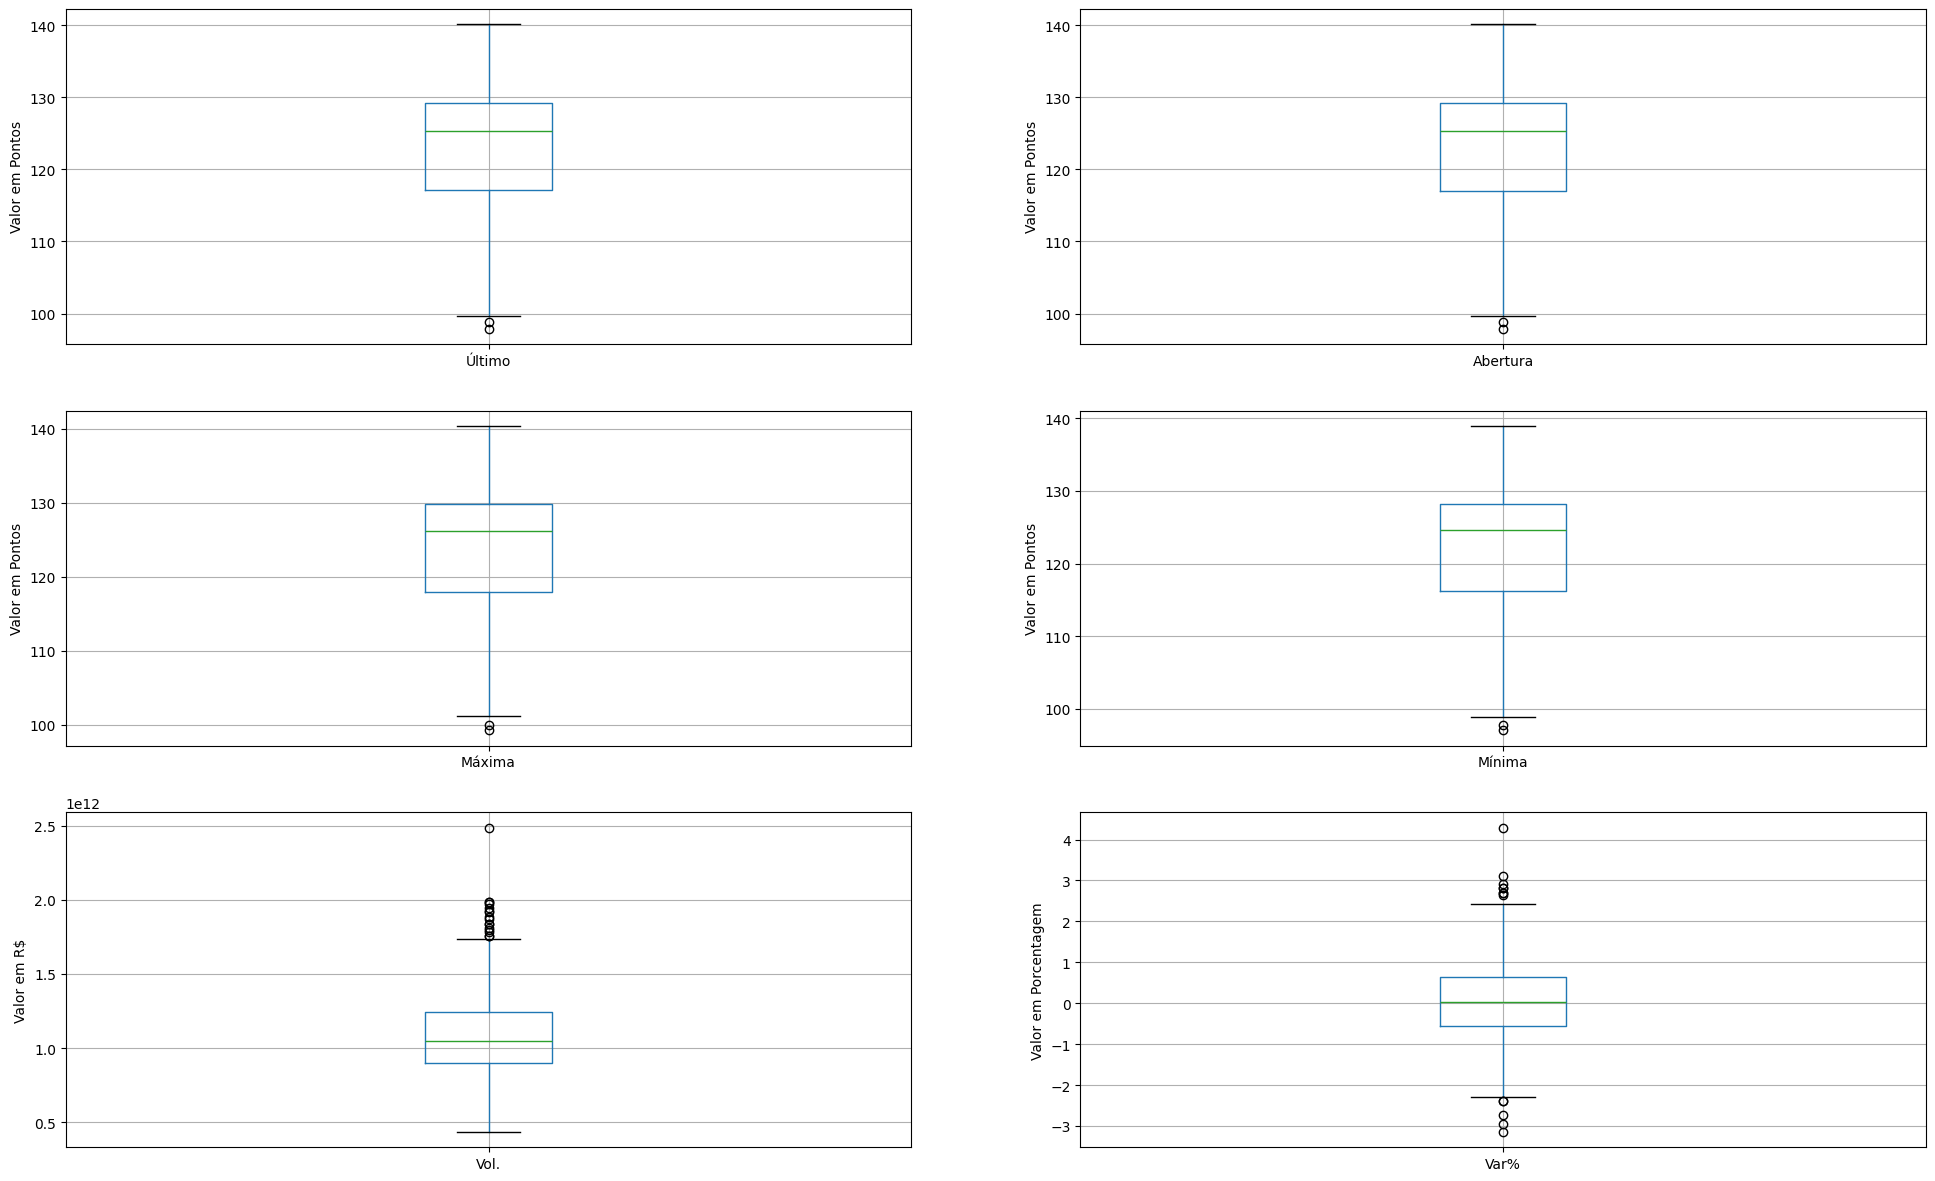

In [17]:
# Avaliando Outliers com Boxplot

plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1) # Parametros -> linhas = 4, colunas = 2, posição = 1(1º gráfico)
fig = df_ibov_copia.boxplot(column='Último')
fig.set_title('')
fig.set_ylabel('Valor em Pontos')

plt.subplot(4, 2, 2) # Parametros -> linhas = 4, colunas = 2, posição = 1(1º gráfico)
fig = df_ibov_copia.boxplot(column='Abertura')
fig.set_title('')
fig.set_ylabel('Valor em Pontos')

plt.subplot(4, 2, 3) # Parametros -> linhas = 4, colunas = 2, posição = 1(1º gráfico)
fig = df_ibov_copia.boxplot(column='Máxima')
fig.set_title('')
fig.set_ylabel('Valor em Pontos')

plt.subplot(4, 2, 4) # Parametros -> linhas = 4, colunas = 2, posição = 1(1º gráfico)
fig = df_ibov_copia.boxplot(column='Mínima')
fig.set_title('')
fig.set_ylabel('Valor em Pontos')

plt.subplot(4, 2, 5) # Parametros -> linhas = 4, colunas = 2, posição = 1(1º gráfico)
fig = df_ibov_copia.boxplot(column='Vol.')
fig.set_title('')
fig.set_ylabel('Valor em R$')

plt.subplot(4, 2, 6) # Parametros -> linhas = 4, colunas = 2, posição = 1(1º gráfico)
fig = df_ibov_copia.boxplot(column='Var%')
fig.set_title('')
fig.set_ylabel('Valor em Porcentagem')

plt.show()

## **Gráfico temporal de fechamento, volume e variação diarios**

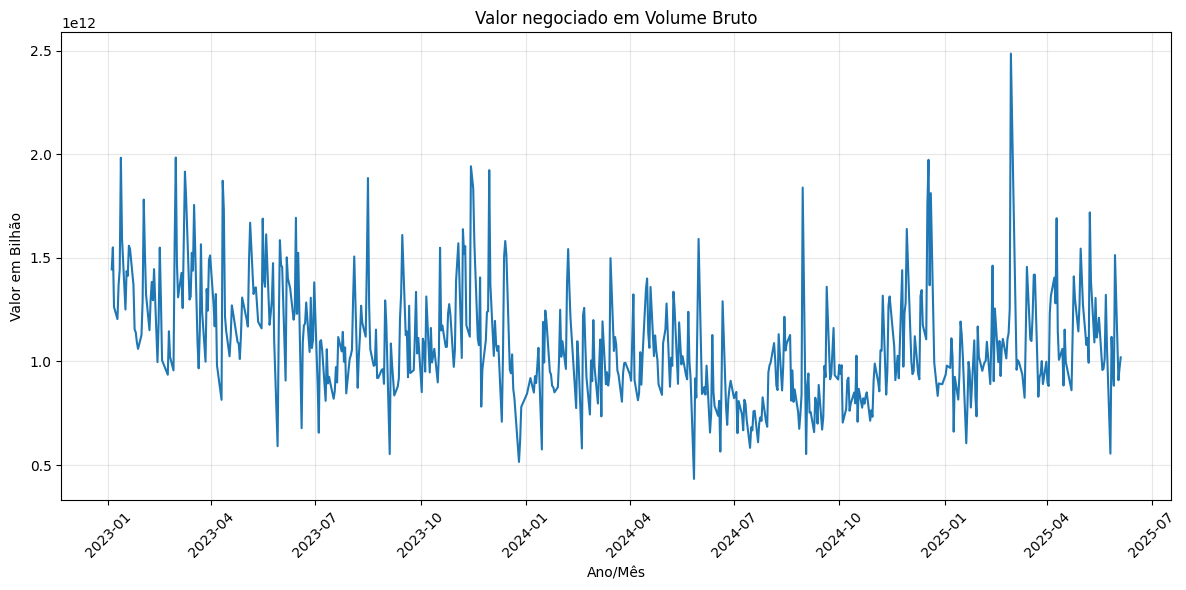

In [18]:
# Observando volume negociado Vol.

plt.figure(figsize=(12,6))
sns.lineplot(data=df_ibov_copia, x=df_ibov_copia.index, y='Vol.')
plt.title('Valor negociado em Volume Bruto')
plt.xlabel('Ano/Mês')
plt.ylabel('Valor em Bilhão')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

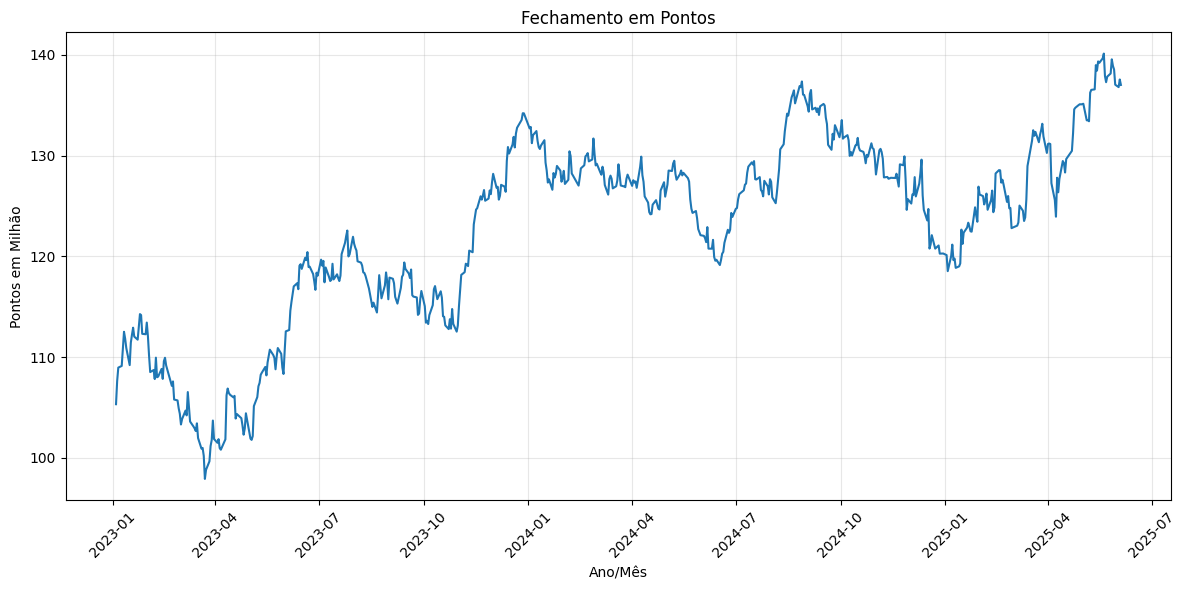

In [19]:
# Observando volume negociado Vol.

plt.figure(figsize=(12,6))
sns.lineplot(data=df_ibov_copia, x=df_ibov_copia.index, y='Último')
plt.title('Fechamento em Pontos')
plt.xlabel('Ano/Mês')
plt.ylabel('Pontos em Milhão')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

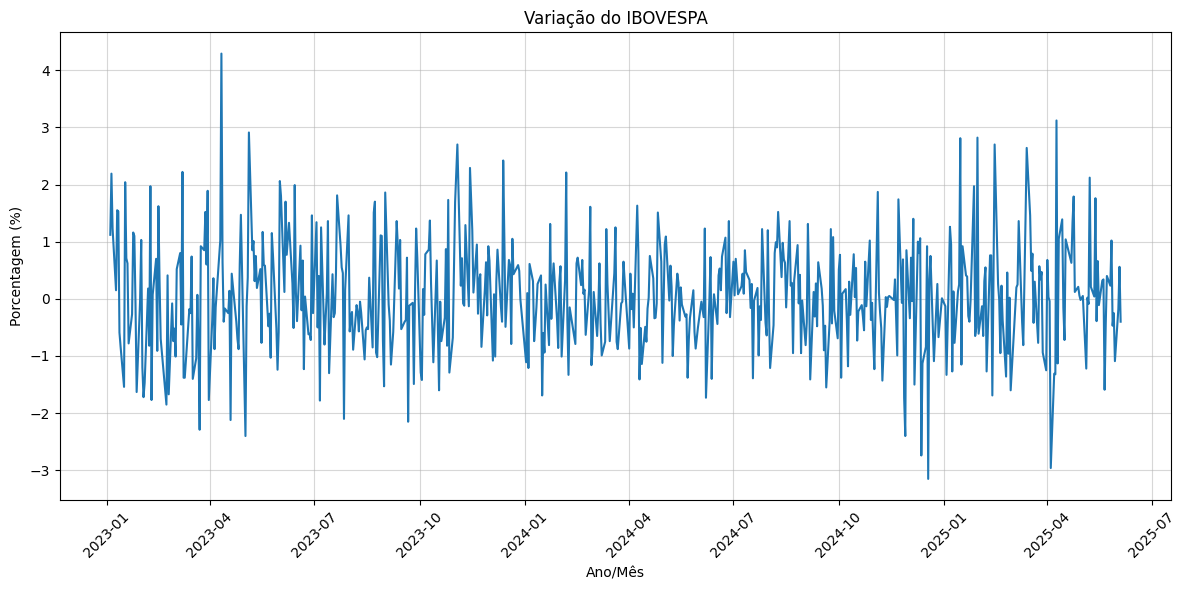

In [20]:
# Observando Variação do IBOVESPA.

plt.figure(figsize=(12,6))
sns.lineplot(data=df_ibov_copia, x=df_ibov_copia.index, y='Var%')
plt.title('Variação do IBOVESPA')
plt.xlabel('Ano/Mês')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

## **Gráfico de distribuiação de fechamento, volume e variação**

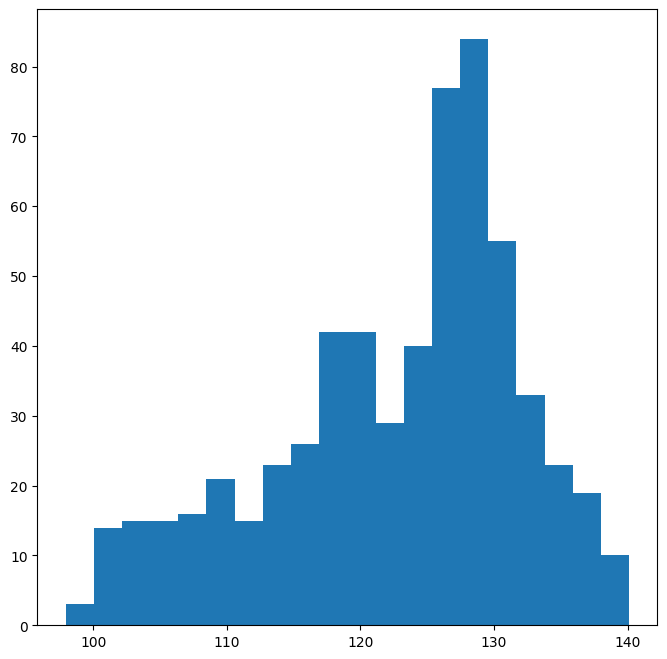

In [21]:
# Distribuição do Fechamento
plt.figure(figsize=(8,8))
plt.hist(x= df_ibov_copia['Último'], bins=20)
plt.show()

In [22]:
# Teste de Shapiro
print(np.median(df_ibov_copia['Último']))
print(np.mean(df_ibov_copia['Último']))
print(np.std(df_ibov_copia['Último']))
print(stats.shapiro(df_ibov_copia['Último']))

125.3675
122.67992358803987
9.304988466030744
ShapiroResult(statistic=np.float64(0.9538056580449326), pvalue=np.float64(8.596152660336466e-13))


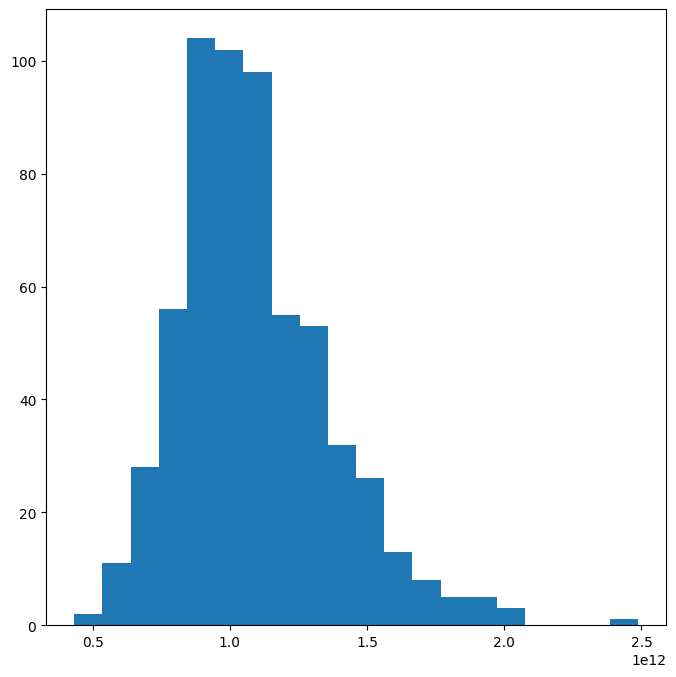

In [23]:
# Distribuição do Volume
plt.figure(figsize=(8,8))
plt.hist(x= df_ibov_copia['Vol.'], bins=20)
plt.show()

In [24]:
# Teste de Shapiro
print(np.mean(df_ibov_copia['Vol.']))
print(np.median(df_ibov_copia['Vol.']))
print(np.std(df_ibov_copia['Vol.']))
print(stats.shapiro(df_ibov_copia['Vol.']))

1087714285714.2858
1045500000000.0
274742086416.35168
ShapiroResult(statistic=np.float64(0.9588281575285662), pvalue=np.float64(6.1533175596184764e-12))


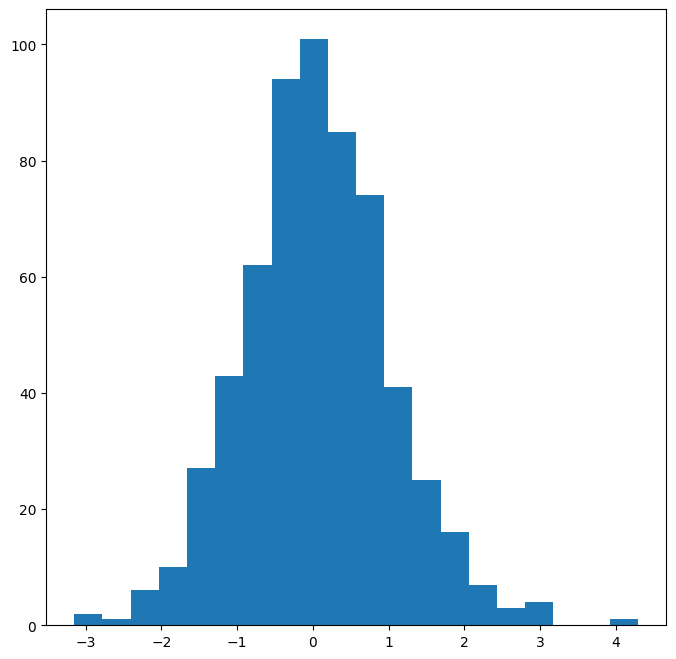

In [25]:
# Distribuição da Variação
plt.figure(figsize=(8,8))
plt.hist(x= df_ibov_copia['Var%'], bins=20)
plt.show()

In [26]:
# Teste de Shapiro
print(np.mean(df_ibov_copia['Var%']))
print(np.median(df_ibov_copia['Var%']))
print(np.std(df_ibov_copia['Var%']))
print(stats.shapiro(df_ibov_copia['Var%']))

0.050166112956810636
0.03
0.9657272949890586
ShapiroResult(statistic=np.float64(0.9930537755022375), pvalue=np.float64(0.006882366187696429))


## Com base nos gráficos de distribuição e os teste de shapiro:  
### Fechamento diário temos uma distribuição assimétrica a direita com valores acumulados entre 120 mil a 135 mil mais ou menos. 
### O volume diário temos uma distribuição assimétrica a esquerda com valores acumulados entre 0.7 Bi a 1.8 Bi mais ou menos.
### A variação diário temos uma distribuição assimétrica a direita com valores acumulados entre -1.2 a 1.4 mais ou menos.

### Criar uma caracteristica (coluna) de fechamento positivo(1) ou negativo(0) utilizando a caracteristica [Último] como referência

In [27]:
'''Exemplo do metodo Shift ele irá varrer o data frame e conforme o parametro colocado nele ele irá fazer o deslocamento
para linha seguinte ou anterior
Ex.: Shift(n) -> Compara valores anteriores (n>0)
     Shift(n) -> Compara valores seguintes (n<0) Vamos usar este para buscar valores seguintes
     Shift(n) -> Compara com o dia anterior (n=1)

''' 
# Exemplos de uso
df = pd.DataFrame({'Preço': [100, 102, 101, 105]})
df['Anterior'] = df['Preço'].shift(1)
df['Seguinte'] = df['Preço'].shift(-1)

df

## Não tem a necessidade de Rodar esse código

,Preço,Anterior,Seguinte
0,100,NaN,102.0
1,102,100.0,101.0
2,101,102.0,105.0
3,105,101.0,NaN


In [28]:
# Caso quisermos utilizar o loop for

'''fechamento = df_ibov['Último'].values
fechamento_categoria = []

for i in range(len(fechamento) - 1):
    if fechamento[i + 1] > fechamento[i]:
        fechamento_categoria.append(1)
    else:
        fechamento_categoria.append(0)

# Como comparamos até o penúltimo, o último dia não tem "dia seguinte"
fechamento_categoria.append(None)  # ou np.nan se preferir

# Adiciona a nova coluna no DataFrame
#df_ibov['Subiu_dia_seguinte'] = fechamento_categoria

print(fechamento_categoria)'''

'fechamento = df_ibov[\'Último\'].values\nfechamento_categoria = []\n\nfor i in range(len(fechamento) - 1):\n    if fechamento[i + 1] > fechamento[i]:\n        fechamento_categoria.append(1)\n    else:\n        fechamento_categoria.append(0)\n\n# Como comparamos até o penúltimo, o último dia não tem "dia seguinte"\nfechamento_categoria.append(None)  # ou np.nan se preferir\n\n# Adiciona a nova coluna no DataFrame\n#df_ibov[\'Subiu_dia_seguinte\'] = fechamento_categoria\n\nprint(fechamento_categoria)'

In [29]:
# Renomeando nome da Coluna Último para Fechamento_Diario
df_ibov_copia = df_ibov_copia.rename(columns={"Último": "Fechamento_Diario"})

In [30]:
# Cria a coluna fechamento com valores Binarios 0 para negativo e 1 para positivo
df_ibov_copia['Tendencia'] = (df_ibov_copia['Fechamento_Diario'].shift(-1) < df_ibov_copia['Fechamento_Diario']).astype('Int64')

In [31]:
# Setando data como indice ()index
#df_ibov_copia = df_ibov_copia.set_index('Data')
#df_ibov_copia

In [32]:
# Existe dados Nulos
df_ibov_copia.isnull().sum()

Fechamento_Diario    0
Abertura             0
Máxima               0
Mínima               0
Vol.                 0
Var%                 0
Tendencia            0
dtype: int64

In [33]:
df_ibov_copia

,Fechamento_Diario,Abertura,Máxima,Mínima,Vol.,Var%,Tendencia
Data,,,,,,,
2025-06-04,137.002,137.547,138.797,136.695,1.020000e+12,-0.40,0
2025-06-03,137.546,136.787,137.672,136.175,9.700000e+11,0.56,1
2025-06-02,136.787,137.026,138.471,136.483,9.100000e+11,-0.18,0
2025-05-30,137.027,138.546,138.637,136.726,1.514000e+12,-1.09,0
2025-05-29,138.534,138.869,139.108,137.993,8.830000e+11,-0.25,0
...,...,...,...,...,...,...,...
2023-01-10,110.817,109.129,111.193,108.478,1.370000e+12,1.55,1
2023-01-09,109.130,108.964,109.938,108.134,1.205000e+12,0.15,1
2023-01-06,108.964,107.642,109.433,107.642,1.263000e+12,1.23,1


In [34]:
# Inicio e fim do ano de extraidos do dataset
print(f'Data Inicial: {df_ibov_copia.index.min()}')
print(f'Data Inicial: {df_ibov_copia.index.max()}')

Data Inicial: 2023-01-04 00:00:00
Data Inicial: 2025-06-04 00:00:00


In [35]:
# Temos dados duplicados
df_ibov_copia.duplicated().sum()

np.int64(0)

O %b é um código de formatação de datas que representa o nome abreviado do mês, como:

Código	Resultado Exemplo  
%b	Jan, Feb, Mar...  
%B	January, February, March... (nome completo do mês)  
%m	01, 02, 03... (número do mês com dois dígitos)  
%Y	2025 (ano com quatro dígitos)  
%y	25 (ano com dois dígitos)  

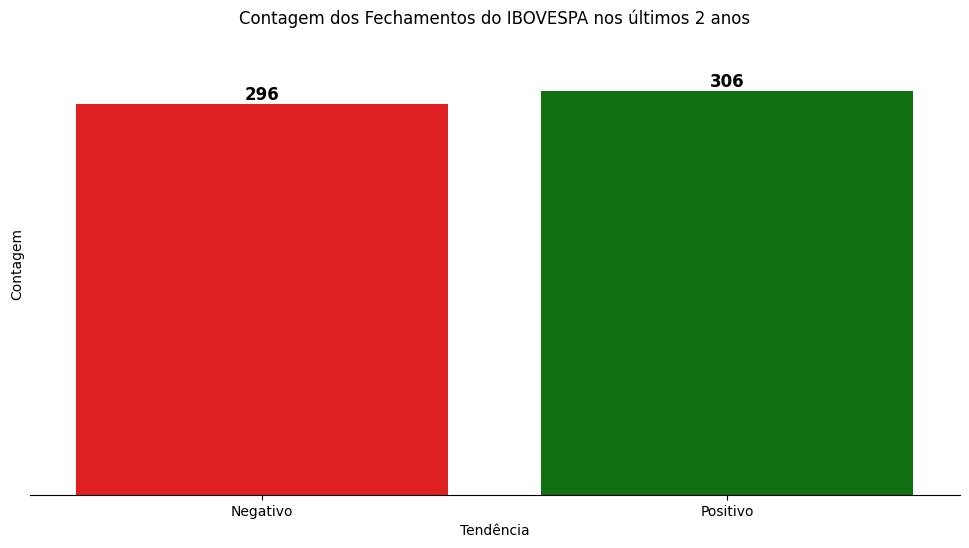

In [36]:
# Quantidade de dias que o IBOVESPA teve o fechamento Positivo e Negativo

# Substitui 0 por 'Negativo' e 1 por 'Positivo'
df_temp = df_ibov_copia.copy()
df_temp['Tendencia'] = df_temp['Tendencia'].map({0: 'Negativo', 1: 'Positivo'})

# Define as cores desejadas para cada categoria
palette_cores = {'Negativo': 'red', 'Positivo': 'green'}

# Gráfico de barra
fig, axes = plt.subplots(figsize=(12,6))

sns.countplot(data=df_temp, x='Tendencia', hue='Tendencia', ax=axes, palette=palette_cores, legend=False)

# Adiciona os labels (valores) nas barras
for p in axes.patches:
    altura = p.get_height()
    axes.annotate(f'{int(altura)}',  # texto (valor da barra)
                  (p.get_x() + p.get_width() / 2, altura),  # posição do texto
                  ha='center', va='bottom', fontsize=12, fontweight='bold')

# Remove os números do eixo Y
axes.set_yticks([])

axes.set_xlabel('Tendência')
axes.set_ylabel('Contagem')
axes.set_ylim(0, 350)
axes.set_title('Contagem dos Fechamentos do IBOVESPA nos últimos 2 anos')
sns.despine(left=True)
plt.show()

# Gerando modelos

In [37]:
df_ibov_copia

,Fechamento_Diario,Abertura,Máxima,Mínima,Vol.,Var%,Tendencia
Data,,,,,,,
2025-06-04,137.002,137.547,138.797,136.695,1.020000e+12,-0.40,0
2025-06-03,137.546,136.787,137.672,136.175,9.700000e+11,0.56,1
2025-06-02,136.787,137.026,138.471,136.483,9.100000e+11,-0.18,0
2025-05-30,137.027,138.546,138.637,136.726,1.514000e+12,-1.09,0
2025-05-29,138.534,138.869,139.108,137.993,8.830000e+11,-0.25,0
...,...,...,...,...,...,...,...
2023-01-10,110.817,109.129,111.193,108.478,1.370000e+12,1.55,1
2023-01-09,109.130,108.964,109.938,108.134,1.205000e+12,0.15,1
2023-01-06,108.964,107.642,109.433,107.642,1.263000e+12,1.23,1


In [38]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [39]:
X = df_ibov_copia.loc[:, ['Fechamento_Diario', 'Vol.', 'Var%']]

y = df_ibov_copia.iloc[:, 6:]

display(X)
display(y)

,Fechamento_Diario,Vol.,Var%
Data,,,
2025-06-04,137.002,1.020000e+12,-0.40
2025-06-03,137.546,9.700000e+11,0.56
2025-06-02,136.787,9.100000e+11,-0.18
2025-05-30,137.027,1.514000e+12,-1.09
2025-05-29,138.534,8.830000e+11,-0.25
...,...,...,...
2023-01-10,110.817,1.370000e+12,1.55
2023-01-09,109.130,1.205000e+12,0.15
2023-01-06,108.964,1.263000e+12,1.23


,Tendencia
Data,
2025-06-04,0
2025-06-03,1
2025-06-02,0
2025-05-30,0
2025-05-29,0
...,...
2023-01-10,1
2023-01-09,1
2023-01-06,1


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.ravel(), test_size=0.2, random_state=25, stratify=y)

display(X_train)
display(X_test)

array([[ 1.26164e+02,  6.54000e+11,  4.00000e-01],
       [ 1.29609e+02,  7.44000e+11,  1.50000e-01],
       [ 1.38423e+02,  1.11600e+12, -3.90000e-01],
       ...,
       [ 1.13301e+02,  1.22900e+12, -1.29000e+00],
       [ 1.03866e+02,  1.31000e+12,  5.20000e-01],
       [ 1.20187e+02,  8.46000e+11,  1.60000e-01]], shape=(481, 3))

array([[ 1.31147e+02,  8.97000e+11,  6.80000e-01],
       [ 1.04932e+02,  1.56700e+12, -7.40000e-01],
       [ 1.27874e+02,  8.40000e+11,  3.00000e-02],
       [ 1.21163e+02,  1.11200e+12,  9.50000e-01],
       [ 1.30416e+02,  1.37800e+12,  2.21000e+00],
       [ 1.03947e+02,  1.09400e+12, -4.00000e-01],
       [ 1.17666e+02,  8.94000e+11,  9.00000e-02],
       [ 1.15409e+02,  1.06000e+12,  3.70000e-01],
       [ 1.20767e+02,  9.95000e+11, -1.09000e+00],
       [ 1.26042e+02,  1.34500e+12, -2.74000e+00],
       [ 1.00978e+02,  1.32600e+12, -8.80000e-01],
       [ 1.27804e+02,  1.09800e+12,  6.20000e-01],
       [ 1.19662e+02,  7.85000e+11,  8.00000e-02],
       [ 1.19299e+02,  9.35000e+11,  2.50000e-01],
       [ 1.07641e+02,  1.55100e+12,  2.19000e+00],
       [ 1.20568e+02,  1.17500e+12,  1.29000e+00],
       [ 1.23932e+02,  1.28100e+12, -1.32000e+00],
       [ 1.27027e+02,  9.37000e+11, -8.80000e-01],
       [ 1.09130e+02,  1.20500e+12,  1.50000e-01],
       [ 1.19076e+02,  6.56000e

# SVC

In [41]:
# Criar modelo svm
modelo_svc = SVC()
modelo_svc.fit(X_train, y_train)

SVC()

In [42]:
previsoes = modelo_svc.predict(X_test)
previsoes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
matrix_confusao = confusion_matrix(y_test, previsoes)
matrix_confusao

array([[ 0, 59],
       [ 0, 62]])

In [44]:
taxa_acerto = accuracy_score(y_test, previsoes)
taxa_acerto

0.512396694214876

# Random_Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
modelo_forest = RandomForestClassifier()
modelo_forest.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
display(modelo_forest.estimators_)
display(modelo_forest.estimators_[1])

[DecisionTreeClassifier(max_features='sqrt', random_state=621026973),
 DecisionTreeClassifier(max_features='sqrt', random_state=980326841),
 DecisionTreeClassifier(max_features='sqrt', random_state=1063108611),
 DecisionTreeClassifier(max_features='sqrt', random_state=1639284609),
 DecisionTreeClassifier(max_features='sqrt', random_state=888437618),
 DecisionTreeClassifier(max_features='sqrt', random_state=1300647394),
 DecisionTreeClassifier(max_features='sqrt', random_state=1913440931),
 DecisionTreeClassifier(max_features='sqrt', random_state=1635389016),
 DecisionTreeClassifier(max_features='sqrt', random_state=235501820),
 DecisionTreeClassifier(max_features='sqrt', random_state=198523492),
 DecisionTreeClassifier(max_features='sqrt', random_state=487606899),
 DecisionTreeClassifier(max_features='sqrt', random_state=721453907),
 DecisionTreeClassifier(max_features='sqrt', random_state=651495217),
 DecisionTreeClassifier(max_features='sqrt', random_state=884484391),
 DecisionTreeCl

DecisionTreeClassifier(max_features='sqrt', random_state=980326841)

In [48]:
previsoes = modelo_forest.predict(X_test)

In [49]:

confusao = confusion_matrix(y_test, previsoes)
taxa_acerto = accuracy_score(y_test, previsoes)
display(taxa_acerto)
display(confusao)

1.0

array([[59,  0],
       [ 0, 62]])

# Regressão Logistica

In [50]:
from sklearn.linear_model import LogisticRegression

In [52]:
df_ibov_copia

,Fechamento_Diario,Abertura,Máxima,Mínima,Vol.,Var%,Tendencia
Data,,,,,,,
2025-06-04,137.002,137.547,138.797,136.695,1.020000e+12,-0.40,0
2025-06-03,137.546,136.787,137.672,136.175,9.700000e+11,0.56,1
2025-06-02,136.787,137.026,138.471,136.483,9.100000e+11,-0.18,0
2025-05-30,137.027,138.546,138.637,136.726,1.514000e+12,-1.09,0
2025-05-29,138.534,138.869,139.108,137.993,8.830000e+11,-0.25,0
...,...,...,...,...,...,...,...
2023-01-10,110.817,109.129,111.193,108.478,1.370000e+12,1.55,1
2023-01-09,109.130,108.964,109.938,108.134,1.205000e+12,0.15,1
2023-01-06,108.964,107.642,109.433,107.642,1.263000e+12,1.23,1


In [55]:
np.corrcoef(df_ibov_copia['Var%'], df_ibov_copia['Tendencia'])

array([[1.        , 0.77032148],
       [0.77032148, 1.        ]])